## Breast Cancer data cleaning

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/breast-cancer.csv')

In [5]:
# Display the first 10 rows
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [7]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [8]:
# Drop duplicates if any
df = df.drop_duplicates()
# Check for duplicates again
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [9]:
# Convert 'diagnosis' column to numeric values
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Verify the conversion
print(df['diagnosis'].value_counts())


diagnosis
0    357
1    212
Name: count, dtype: int64


##Breast Cancer data Visualisation

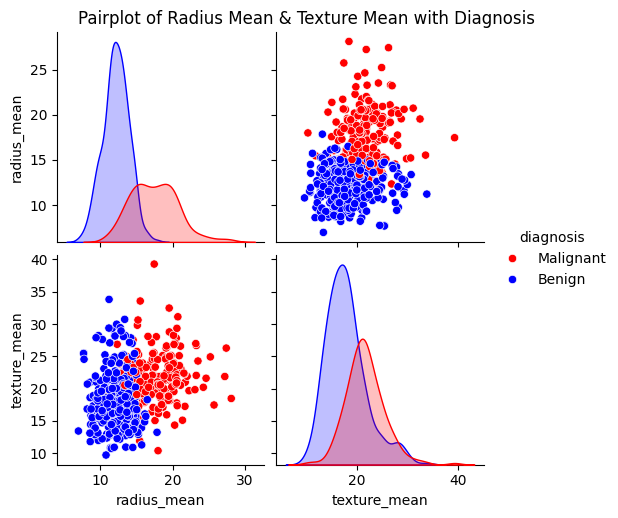

In [24]:
# Convert 'diagnosis' to categorical for better visualization
df['diagnosis'] = df['diagnosis'].map({0: 'Benign', 1: 'Malignant'})

# Create pairplot
sns.pairplot(df, vars=['radius_mean', 'texture_mean'], hue='diagnosis', palette={'Benign': 'blue', 'Malignant': 'red'})

# Show plot
plt.suptitle("Pairplot of Radius Mean & Texture Mean with Diagnosis", y=1.02)
plt.show()

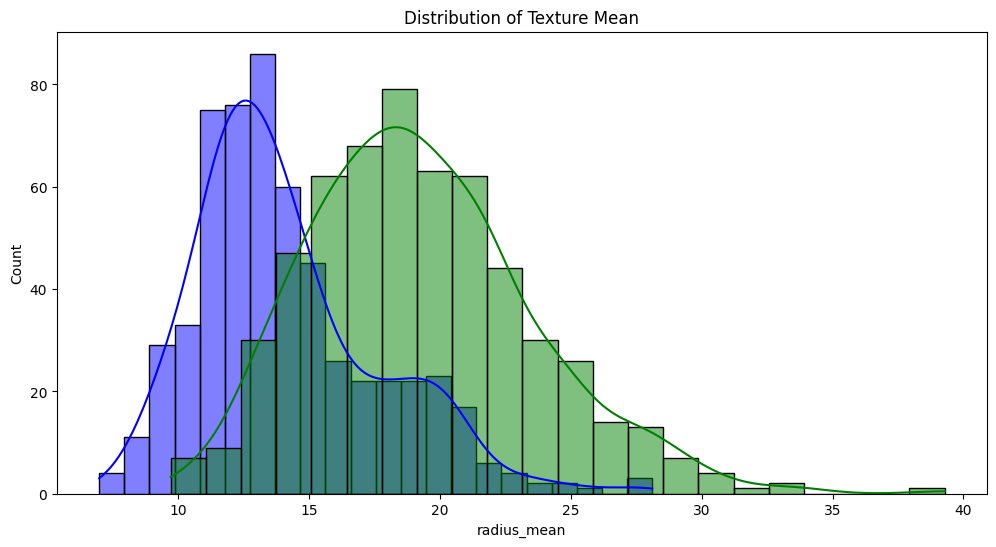

In [22]:
# Plot histograms for 'radius_mean' and 'texture_mean'
plt.figure(figsize=(12, 6))

# Histogram for radius_mean

sns.histplot(df['radius_mean'], kde=True, color='blue')
plt.title('Distribution of Radius Mean')

# Histogram for texture_mean

sns.histplot(df['texture_mean'], kde=True, color='green')
plt.title('Distribution of Texture Mean')

plt.show()



## Breast Cancer Model

In [ ]:
# Calculate IQR for 'radius_mean' and 'texture_mean'
Q1_radius = df['radius_mean'].quantile(0.25)
Q3_radius = df['radius_mean'].quantile(0.75)
IQR_radius = Q3_radius - Q1_radius

Q1_texture = df['texture_mean'].quantile(0.25)
Q3_texture = df['texture_mean'].quantile(0.75)
IQR_texture = Q3_texture - Q1_texture

# Define outlier threshold (1.5 times the IQR)
lower_bound_radius = Q1_radius - 1.5 * IQR_radius
upper_bound_radius = Q3_radius + 1.5 * IQR_radius

lower_bound_texture = Q1_texture - 1.5 * IQR_texture
upper_bound_texture = Q3_texture + 1.5 * IQR_texture

# Filter out outliers
df_no_outliers = df[(df['radius_mean'] >= lower_bound_radius) & (df['radius_mean'] <= upper_bound_radius) &
                    (df['texture_mean'] >= lower_bound_texture) & (df['texture_mean'] <= upper_bound_texture)]

# Display the shape before and after removing outliers
print(f"Original dataset shape: {df.shape}")
print(f"Shape after removing outliers: {df_no_outliers.shape}")


Original dataset shape: (569, 32)
Shape after removing outliers: (548, 32)


In [ ]:
df_no_outliers

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
from sklearn.model_selection import train_test_split
# Define features (X) and target variable (y)
X = df_no_outliers.drop(columns=['id', 'diagnosis'])  # Remove 'id' as it's not useful
y = df_no_outliers['diagnosis']  # Target variable
# Split into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting datasets
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

Training set size: (438, 30), Testing set size: (110, 30)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

print("Models trained successfully!")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models trained successfully!


In [ ]:
# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

print("Predictions completed!")


Predictions completed!


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate models
def evaluate_model(model_name, y_test, y_pred):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("-" * 40)

# Evaluate Logistic Regression
evaluate_model("Logistic Regression", y_test, y_pred_log_reg)

# Evaluate Decision Tree
evaluate_model("Decision Tree", y_test, y_pred_decision_tree)

# Evaluate Random Forest
evaluate_model("Random Forest", y_test, y_pred_random_forest)


Evaluation Metrics for Logistic Regression:
Accuracy: 0.9455
Precision: 0.9756
Recall: 0.8889
F1 Score: 0.9302
----------------------------------------
Evaluation Metrics for Decision Tree:
Accuracy: 0.9364
Precision: 0.9524
Recall: 0.8889
F1 Score: 0.9195
----------------------------------------
Evaluation Metrics for Random Forest:
Accuracy: 0.9727
Precision: 1.0000
Recall: 0.9333
F1 Score: 0.9655
----------------------------------------


 **✅Random Forest is the best-performing model**